$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{University of Los Andes}$$
$$\textrm{High Energy Physics Group: Phenomenology of Particles}$$

This code was written to be running in Docker. If you do not have a Docker inside hep-server2 please refer to: https://github.com/Phenomenology-group-uniandes/Tutoriales_Generales

$\textbf{Preliminaries}$ 

The libraries used here are:

In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

In [2]:
from Uniandes_Framework.delphes_reader import root_analysis #It contains some useful functions like make_histograms or get_kinematics_row.

from ROOT import TCanvas #It is necessary to show plots with ROOT.
from ROOT import TH1F #It is necessary to plot histograms with ROOT.
from ROOT import THStack #It is necessary to plot many histograms at the same time with ROOT.
from ROOT import TLegend #It is necessary to plot labels when you plot many histograms at the same time with ROOT.

import pandas as pd #Python library is useful for data science.

Welcome to JupyROOT 6.22/06


Until now, we created .csv files. Now we will use it to plot histograms.

**1. Read .csv files:**

To do this, we can use pandas:

In [3]:
Datasets = {'z': pd.read_csv('Data_z.csv'),
            'stop': pd.read_csv('Data_stop.csv'),
            'ttbar': pd.read_csv('Data_ttbar.csv'),
            'ww': pd.read_csv('Data_ww.csv')}

So,

In [4]:
Datasets['stop']

,pT_{Z}(GeV),#eta_{Z},#phi_{Z},Energy_{Z}(GeV),Mass_{Z}(GeV),pT_{#mu_{1}}(GeV),#eta_{#mu_{1}},#phi_{#mu_{1}},Energy_{#mu_{1}}(GeV),Mass_{#mu_{1}}(GeV)),...,#Delta{#eta}_{#mu_{1}#mu_{2}},#Delta{#phi}_{#mu_{1}#mu_{2}},#Delta{pT}_{#mu_{1}#mu_{2}}(GeV),#Delta{#vec{pT}}_{#mu_{1}#mu_{2}}(GeV),#Delta{#vec{p}}_{#mu_{1}#mu_{2}}(GeV),pT_{#mu_{2}}(GeV),#eta_{#mu_{2}},#phi_{#mu_{2}},Energy_{#mu_{2}}(GeV),Mass_{#mu_{2}}(GeV))
0,45.543166,0.735161,1.892232,82.497517,58.254290,39.726429,0.120564,1.231759,40.015644,0.105658,...,-0.847968,-1.704597,11.534151,51.689529,58.306089,28.192278,0.968532,2.936356,42.481872,0.105658
1,35.550365,1.996663,1.769846,206.594030,157.820829,88.437050,0.656892,0.843829,108.213746,0.105658,...,-0.157797,-2.740884,15.596497,158.081901,158.126742,72.840553,0.814688,-2.698472,98.380283,0.105658
2,84.196153,0.313676,-2.886560,120.883981,82.481878,58.545189,0.090600,2.633425,58.785726,0.105658,...,-0.271174,-1.531344,0.300335,80.938323,82.548098,58.244854,0.361774,-2.118416,62.098255,0.105658
3,86.960182,-1.412185,1.208230,326.145743,265.747893,84.193352,0.571635,0.444047,98.327859,0.105658,...,2.516252,-1.912680,20.325119,121.545342,295.617261,63.868233,-1.944617,2.356727,227.817884,0.105658
4,91.563436,-0.412365,0.019620,118.831570,65.029120,94.202202,-0.385520,-0.166564,101.289823,0.105658,...,-0.293271,-1.814878,76.735147,99.872132,106.030572,17.467054,-0.092249,1.648314,17.541746,0.105658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,21.610681,-0.454527,1.769293,54.326556,48.795891,22.531841,-1.001603,2.253584,34.811097,0.105658,...,-2.218978,1.897230,11.909359,27.821224,51.136590,10.622482,1.217375,0.356354,19.515459,0.105658
106,12.571026,-2.995276,-2.941065,156.371798,92.651876,30.682158,-2.115768,-1.850946,129.118215,0.105658,...,-2.118749,2.720238,3.428900,56.658971,137.697961,27.253258,0.002981,1.712001,27.253584,0.105658
107,29.884160,-0.396376,-1.633173,155.670568,152.290663,35.186256,-1.553373,-1.222875,86.891114,0.105658,...,-3.810776,2.149189,20.950441,44.591469,153.363730,14.235815,2.257404,2.911121,68.779454,0.105658
108,103.799067,-0.111048,0.628315,184.619288,152.238708,127.766342,0.052833,1.048066,127.944744,0.105658,...,0.387784,2.232970,74.128990,166.217211,168.095274,53.637352,-0.334952,-1.184904,56.674543,0.105658


**2. Plot histograms with matplotlib using Uniandes_Framework:**

In python, it is very common to think in Matplotlib when you want to plot something. We create a function to plot whatever Dataset column using Matplotlib:

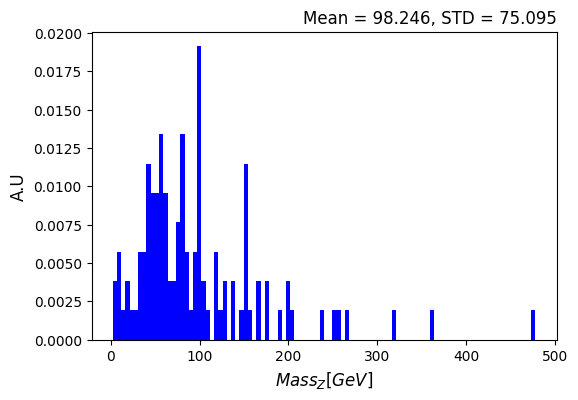

In [5]:
root_analysis.histos_matplotlib(Datasets['stop'], 'Mass_{Z}(GeV)') #This function also has other parameters to select nbins, color, log10 scale, or save the plot in a file.

However, in High Energy Physics people usually tend to use ROOT. By this, we made a more complex function to create all the histograms contained in a DataFrame using ROOT.

**3. Create histograms:**

We can use the function **root_analysis.makehistograms()**. If we want to generate all the histograms for each column on Datasets['stop'], it is enough to run the following code:

In [6]:
default_hist_bins_dict={
    "#Delta{R}":[96,0,7],
    "#Delta{#eta}":[80,-5,5],
    "#Delta{#phi}":[52,-3.25,3.25],
    "#Delta{pT}":[120, 0.0, 1500.0],
    "#Delta{#vec{pT}}":[240, 0.0, 4800.0],
    "#Delta{#vec{p}}":[240, 0.0, 4800.0],
    "MET(GeV)":[80, 0.0, 1000.0],
    "pT_": [160, 0.0, 2000.0],
    "sT(GeV)": [200, 0.0, 4000.0],
    "mT(GeV)": [200, 0.0, 4000.0],
    "#eta_":[80, -5, 5],
    "#phi_":[128, -3.2, 3.2],
    "Energy_":[80, 0.0, 1000.0],
    "m_ll(GeV)" : [100, 800.0, 8000.0],
    "Mass_{Z}(GeV)": [200, 0.0, 1000.0]
}

In [7]:
root_analysis.make_histograms(Datasets['stop'], hist_bins_dict = default_hist_bins_dict)

{'pT_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x555e03ce14e0>,
 '#eta_{Z}': <cppyy.gbl.TH1F object at 0x555e03e2f640>,
 '#phi_{Z}': <cppyy.gbl.TH1F object at 0x555e03dfd250>,
 'Energy_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x555e00d8a2d0>,
 'Mass_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e0d8d0>,
 'pT_{#mu_{1}}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e35ad0>,
 '#eta_{#mu_{1}}': <cppyy.gbl.TH1F object at 0x555e00d8c690>,
 '#phi_{#mu_{1}}': <cppyy.gbl.TH1F object at 0x555e03e27160>,
 'Energy_{#mu_{1}}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e1bd00>,
 '#Delta{R}_{#mu_{1}#mu_{2}}': <cppyy.gbl.TH1F object at 0x555e03e1c130>,
 '#Delta{#eta}_{#mu_{1}#mu_{2}}': <cppyy.gbl.TH1F object at 0x555e03e0e0f0>,
 '#Delta{#phi}_{#mu_{1}#mu_{2}}': <cppyy.gbl.TH1F object at 0x555e03e20ef0>,
 '#Delta{pT}_{#mu_{1}#mu_{2}}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e21320>,
 '#Delta{#vec{pT}}_{#mu_{1}#mu_{2}}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e21b20>,
 '#Delta{#vec{p}}_{#mu_{1}#mu_{2}}(GeV)': <cppyy.gbl.

This function returns a directory with TH1F objects (ROOT histograms).

We can do this with all Datasets and save all dictionaries inside a bigger dictionary:

In [8]:
Histos_Dictionary = {'z': root_analysis.make_histograms(Datasets['z'], hist_bins_dict = default_hist_bins_dict),
                    'stop': root_analysis.make_histograms(Datasets['stop'], hist_bins_dict = default_hist_bins_dict),
                    'ttbar': root_analysis.make_histograms(Datasets['ttbar'], hist_bins_dict = default_hist_bins_dict),
                    'ww': root_analysis.make_histograms(Datasets['ww'], hist_bins_dict = default_hist_bins_dict)}

In [9]:
Histos_Dictionary

{'z': {'pT_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e377c0>,
  '#eta_{Z}': <cppyy.gbl.TH1F object at 0x555e03e24160>,
  '#phi_{Z}': <cppyy.gbl.TH1F object at 0x555e03e24630>,
  'Energy_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e24ed0>,
  'Mass_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e24ac0>,
  'pT_{#mu_{1}}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e56d20>,
  '#eta_{#mu_{1}}': <cppyy.gbl.TH1F object at 0x555e03e57280>,
  '#phi_{#mu_{1}}': <cppyy.gbl.TH1F object at 0x555e03e329d0>,
  'Energy_{#mu_{1}}(GeV)': <cppyy.gbl.TH1F object at 0x555e0161db10>,
  '#Delta{R}_{#mu_{1}#mu_{2}}': <cppyy.gbl.TH1F object at 0x555e0161e460>,
  '#Delta{#eta}_{#mu_{1}#mu_{2}}': <cppyy.gbl.TH1F object at 0x555e0161e940>,
  '#Delta{#phi}_{#mu_{1}#mu_{2}}': <cppyy.gbl.TH1F object at 0x555e03e51ac0>,
  '#Delta{pT}_{#mu_{1}#mu_{2}}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e51fa0>,
  '#Delta{#vec{pT}}_{#mu_{1}#mu_{2}}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e52480>,
  '#Delta{#vec{p}}_{#mu_{1}#mu_{2}

Now, if we want to plot one of them. We can use TCanvas:

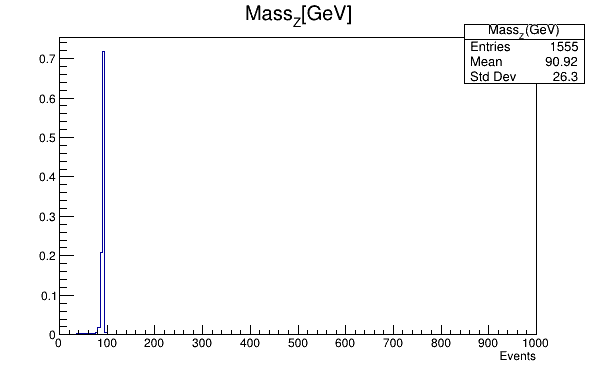

In [10]:
canvas = TCanvas("Canvas", " ", 600, 400)
Histos_Dictionary['z']['Mass_{Z}(GeV)'].Draw('hist')
canvas.Draw()

**4. Overlap or Stack histograms:**

We can use the function **root_analysis.overlap_histos()**. This function has two main parameters: kinematic_variable and Dict_Histos, they are a string with the name of the kinematic variable and the directory with all the histograms (it should be a directory with the same structure that we use in this tutorial) respectively.

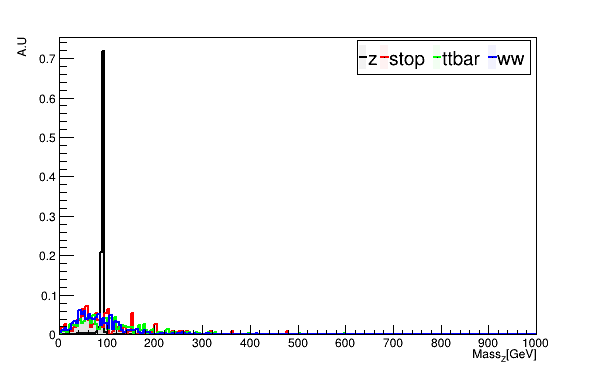

In [11]:
Histos, Canva, Legend = root_analysis.overlap_histos(kinematic_variable= 'Mass_{Z}(GeV)', 
                                                     dict_histos= Histos_Dictionary)

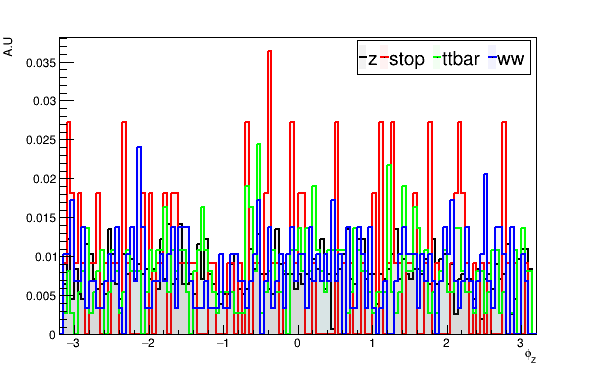

In [12]:
Histos, Canva, Legend = root_analysis.overlap_histos(kinematic_variable= '#phi_{Z}', 
                                                     dict_histos= Histos_Dictionary)

If we want to Stack we have to add Stack = True as other parameter inside the function:

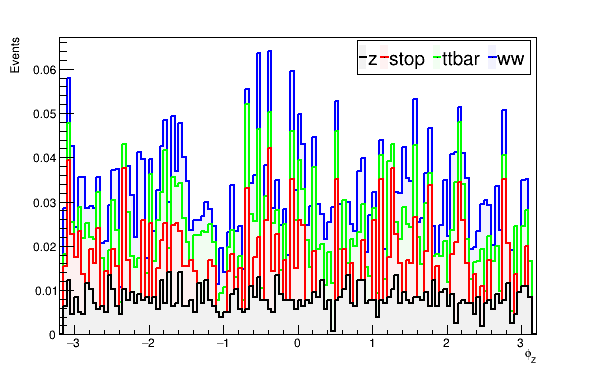

In [13]:
Histos, Canva, Legend = root_analysis.overlap_histos(kinematic_variable= '#phi_{Z}', 
                                                     dict_histos= Histos_Dictionary,
                                                     stack= True)

Of course, before doing that we have to care about the normalization of each histogram. 

**This code is written to stack histograms that are normalized with the number of physical events.**

**5. Sum histograms:**

We can use the function **root_analysis.sum_histos()** and put as a parameter a list with the histograms that we want to sum.

In [14]:
Histos_for_sum = [Histos_Dictionary['z']['#phi_{Z}'], Histos_Dictionary['ww']['#phi_{Z}'], Histos_Dictionary['ttbar']['#phi_{Z}']]

In [15]:
Histo = root_analysis.sum_histos(Histos_for_sum)

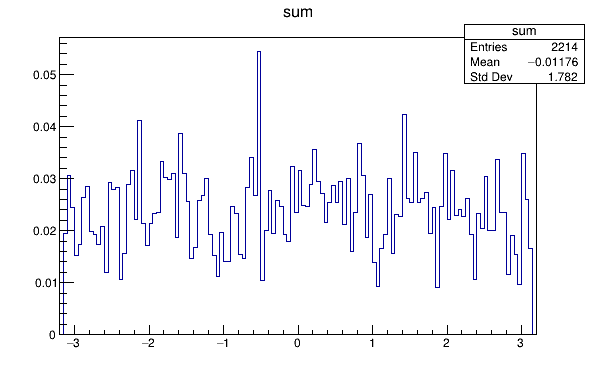

In [16]:
canvas = TCanvas("sum_histos", " ", 600, 400)
Histo.Draw('hist')
canvas.Draw()

We also can do the substraction of the histograms, to do this we must set the parameter substract as True:

In [17]:
Histo = root_analysis.sum_histos(Histos_for_sum, substract= True)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: sum_histos


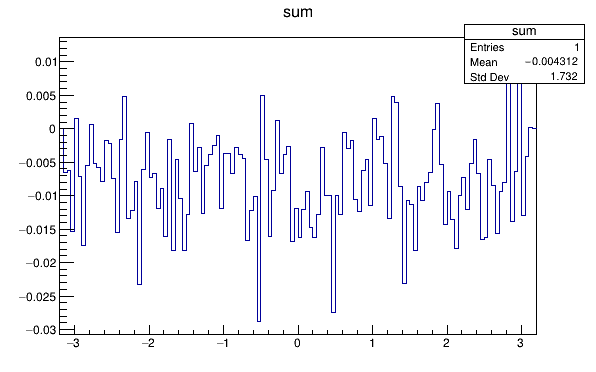

In [18]:
canvas = TCanvas("sum_histos", " ", 600, 400)
Histo.Draw('hist')
canvas.Draw()

Again, before do that we have to care about normalization of each histograms. 

**This code is written to sum histograms that are normalized with the number of physical events.**

Conclusion: **Working with the correct normalization is the user responsibility.**

**6. Fill holes in histograms**

In order to know which histograms have holes we can use the function **root_analysis.review_holes_in_histograms()**. This function has one parameter: Dict[str, TH1F] (It is a dictionary that contains all the histograms).

Let us try to analyze if Histos_Dictionary['z'] has histograms with holes:

In [19]:
root_analysis.review_holes_in_histograms(Histos_Dictionary['z'])

['pT_{Z}(GeV)',
 '#eta_{Z}',
 '#phi_{Z}',
 'Energy_{Z}(GeV)',
 'Mass_{Z}(GeV)',
 'pT_{#mu_{1}}(GeV)',
 '#eta_{#mu_{1}}',
 '#phi_{#mu_{1}}',
 'Energy_{#mu_{1}}(GeV)',
 '#Delta{R}_{#mu_{1}#mu_{2}}',
 '#Delta{#eta}_{#mu_{1}#mu_{2}}',
 '#Delta{pT}_{#mu_{1}#mu_{2}}(GeV)',
 '#Delta{#vec{pT}}_{#mu_{1}#mu_{2}}(GeV)',
 '#Delta{#vec{p}}_{#mu_{1}#mu_{2}}(GeV)',
 'pT_{#mu_{2}}(GeV)',
 '#eta_{#mu_{2}}',
 '#phi_{#mu_{2}}',
 'Energy_{#mu_{2}}(GeV)']

Let us see one the holes that 'pT_{Z}(GeV)' histogram have:

Warning in <TCanvas::Constructor>: Deleting canvas with same name: sum_histos


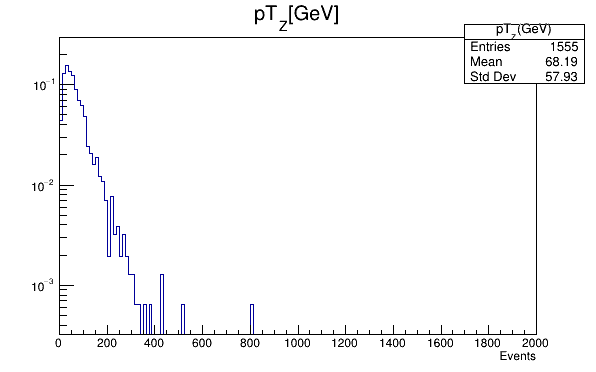

In [20]:
canvas = TCanvas("sum_histos", " ", 600, 400)
Histos_Dictionary['z']['pT_{Z}(GeV)'].Draw('hist')
canvas.Draw()
canvas.SetLogy()

Now, if we want to fill the holes we can use the **function root_analysis.fill_holes_in_histogram()**.

In [21]:
Histo_filled = root_analysis.fill_holes_in_histogram(histo = Histos_Dictionary['z']['pT_{Z}(GeV)'])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: sum_histos


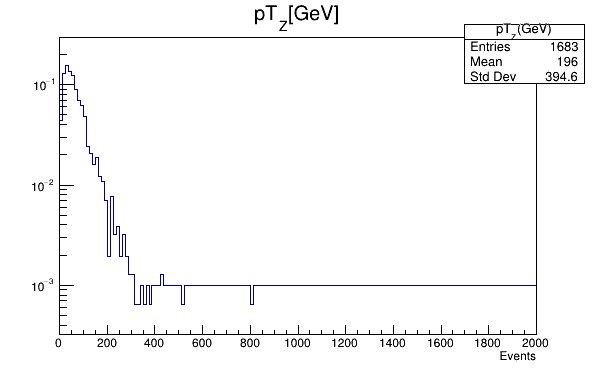

In [22]:
canvas = TCanvas("sum_histos", " ", 600, 400)
Histo_filled.Draw('hist')
canvas.Draw()
canvas.SetLogy()

This function uses by default a value of 10e-4, however we can set the value using the parameter value_to_fill. Let us fill the holes of 'Energy_{#mu_{1}}(GeV)' histogram with 10e-8.

In [23]:
Histo_filled = root_analysis.fill_holes_in_histogram(histo = Histos_Dictionary['z']['Energy_{#mu_{1}}(GeV)'], value_to_fill= 10e-8)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: sum_histos


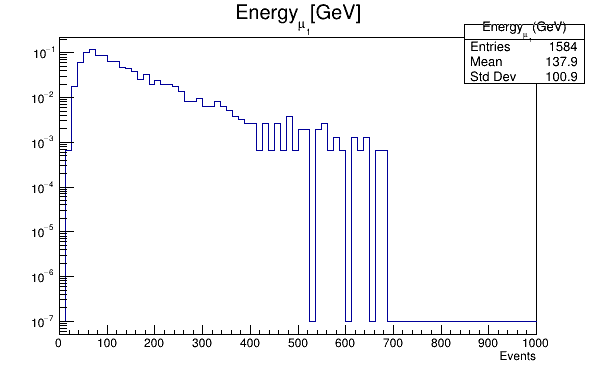

In [24]:
canvas = TCanvas("sum_histos", " ", 600, 400)
Histo_filled.Draw('hist')
canvas.Draw()
canvas.SetLogy()

**7. Save histograms in a .root file**

There are two options to save histograms in a .root file. You can use Uproot (In case you want, please refer to: https://github.com/Phenomenology-group-uniandes/Tutoriales_Generales/blob/main/5_Uproot_guardado_y_lectura_en_archivos_root.ipynb) or use the function **root_analysis.write_root_files()**. This function has two parameters: file_name (It is the name that the .root file will have) and  dict_Hist  It is a dictionary where the keys are the names of the histograms and the values are the TH1F histogram).

Let us try to save Histos_Dictionary['z'] in a root file.

In [25]:
Histos_Dictionary['z']

{'pT_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e377c0>,
 '#eta_{Z}': <cppyy.gbl.TH1F object at 0x555e03e24160>,
 '#phi_{Z}': <cppyy.gbl.TH1F object at 0x555e03e24630>,
 'Energy_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e24ed0>,
 'Mass_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e24ac0>,
 'pT_{#mu_{1}}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e56d20>,
 '#eta_{#mu_{1}}': <cppyy.gbl.TH1F object at 0x555e03e57280>,
 '#phi_{#mu_{1}}': <cppyy.gbl.TH1F object at 0x555e03e329d0>,
 'Energy_{#mu_{1}}(GeV)': <cppyy.gbl.TH1F object at 0x555e0161db10>,
 '#Delta{R}_{#mu_{1}#mu_{2}}': <cppyy.gbl.TH1F object at 0x555e0161e460>,
 '#Delta{#eta}_{#mu_{1}#mu_{2}}': <cppyy.gbl.TH1F object at 0x555e0161e940>,
 '#Delta{#phi}_{#mu_{1}#mu_{2}}': <cppyy.gbl.TH1F object at 0x555e03e51ac0>,
 '#Delta{pT}_{#mu_{1}#mu_{2}}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e51fa0>,
 '#Delta{#vec{pT}}_{#mu_{1}#mu_{2}}(GeV)': <cppyy.gbl.TH1F object at 0x555e03e52480>,
 '#Delta{#vec{p}}_{#mu_{1}#mu_{2}}(GeV)': <cppyy.gbl.

In [26]:
root_analysis.write_root_file(file_name= 'Histos_z.root', dict_Hist= Histos_Dictionary['z'])

**Note:** We can not use the function directly with Histos_Dictionary because Histos_Dictionary is a dictionary that contains dictionary, and the parameter of the function must be a dictionary of histograms.

**8. Read histograms in a .root file**

Again, there are two options to read histograms in a .root file. You can use Uproot (In case you want, please refer to: https://github.com/Phenomenology-group-uniandes/Tutoriales_Generales/blob/main/5_Uproot_guardado_y_lectura_en_archivos_root.ipynb) or use the function **root_analysis.read_root_files()**. This function has two parameters: path_root_file (It is the path of the root file) and  expected_keys  It is a list with the names of the histograms that are expected to be in the root fil).

Let us try toreadeHistos_z.root, we need to know the keys that were used to create the file initially. Of course, in this case is easy.

In [27]:
list(Histos_Dictionary['z'].keys())

['pT_{Z}(GeV)',
 '#eta_{Z}',
 '#phi_{Z}',
 'Energy_{Z}(GeV)',
 'Mass_{Z}(GeV)',
 'pT_{#mu_{1}}(GeV)',
 '#eta_{#mu_{1}}',
 '#phi_{#mu_{1}}',
 'Energy_{#mu_{1}}(GeV)',
 '#Delta{R}_{#mu_{1}#mu_{2}}',
 '#Delta{#eta}_{#mu_{1}#mu_{2}}',
 '#Delta{#phi}_{#mu_{1}#mu_{2}}',
 '#Delta{pT}_{#mu_{1}#mu_{2}}(GeV)',
 '#Delta{#vec{pT}}_{#mu_{1}#mu_{2}}(GeV)',
 '#Delta{#vec{p}}_{#mu_{1}#mu_{2}}(GeV)',
 'pT_{#mu_{2}}(GeV)',
 '#eta_{#mu_{2}}',
 '#phi_{#mu_{2}}',
 'Energy_{#mu_{2}}(GeV)']

However, if we do not remember the keys we can use the function **root_analysis.get_root_file_keys()**:

In [28]:
Keys = root_analysis.get_root_file_keys('Histos_z.root')

In [29]:
Keys

['pT_{Z}(GeV)',
 '#eta_{Z}',
 '#phi_{Z}',
 'Energy_{Z}(GeV)',
 'Mass_{Z}(GeV)',
 'pT_{#mu_{1}}(GeV)',
 '#eta_{#mu_{1}}',
 '#phi_{#mu_{1}}',
 'Energy_{#mu_{1}}(GeV)',
 '#Delta{R}_{#mu_{1}#mu_{2}}',
 '#Delta{#eta}_{#mu_{1}#mu_{2}}',
 '#Delta{#phi}_{#mu_{1}#mu_{2}}',
 '#Delta{pT}_{#mu_{1}#mu_{2}}(GeV)',
 '#Delta{#vec{pT}}_{#mu_{1}#mu_{2}}(GeV)',
 '#Delta{#vec{p}}_{#mu_{1}#mu_{2}}(GeV)',
 'pT_{#mu_{2}}(GeV)',
 '#eta_{#mu_{2}}',
 '#phi_{#mu_{2}}',
 'Energy_{#mu_{2}}(GeV)']

Now, if you know the keys it is enough to use the function **root_analysis.read_root_file()**

In [30]:
root_analysis.read_root_file(path_root_file= 'Histos_z.root', expected_keys= Keys)

{'pT_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x555e04440580>,
 '#eta_{Z}': <cppyy.gbl.TH1F object at 0x555e046129b0>,
 '#phi_{Z}': <cppyy.gbl.TH1F object at 0x555e04445c60>,
 'Energy_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x555e0444e040>,
 'Mass_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x555e04437670>,
 'pT_{#mu_{1}}(GeV)': <cppyy.gbl.TH1F object at 0x555e0420d790>,
 '#eta_{#mu_{1}}': <cppyy.gbl.TH1F object at 0x555e0457ac40>,
 '#phi_{#mu_{1}}': <cppyy.gbl.TH1F object at 0x555e045f8c10>,
 'Energy_{#mu_{1}}(GeV)': <cppyy.gbl.TH1F object at 0x555e045ea160>,
 '#Delta{R}_{#mu_{1}#mu_{2}}': <cppyy.gbl.TH1F object at 0x555e0461f0f0>,
 '#Delta{#eta}_{#mu_{1}#mu_{2}}': <cppyy.gbl.TH1F object at 0x555e045fd310>,
 '#Delta{#phi}_{#mu_{1}#mu_{2}}': <cppyy.gbl.TH1F object at 0x555e046113b0>,
 '#Delta{pT}_{#mu_{1}#mu_{2}}(GeV)': <cppyy.gbl.TH1F object at 0x555e0460e4c0>,
 '#Delta{#vec{pT}}_{#mu_{1}#mu_{2}}(GeV)': <cppyy.gbl.TH1F object at 0x555e0460dc40>,
 '#Delta{#vec{p}}_{#mu_{1}#mu_{2}}(GeV)': <cppyy.gbl.